In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().any()

In [5]:
df1 = df.drop(["PassengerId", "SibSp", "Parch", "Cabin","Ticket","Name"], axis = 1)
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [8]:
df1.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
Embarked     True
dtype: bool

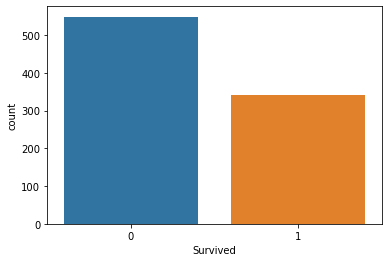

In [9]:
sns.countplot(x="Survived",data=df1)

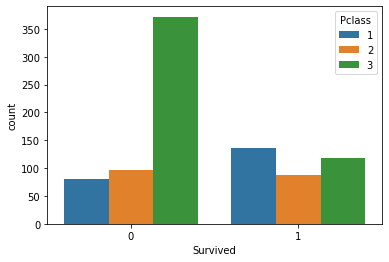

In [10]:
sns.countplot(x="Survived",hue = 'Pclass' ,data=df1)

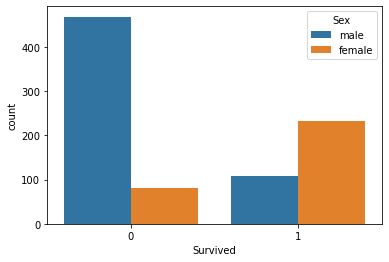

In [11]:
sns.countplot(x="Survived",hue = 'Sex' ,data=df1)

In [12]:
df1['Age'].isnull().sum()

177

In [13]:
df1.shape

(891, 6)

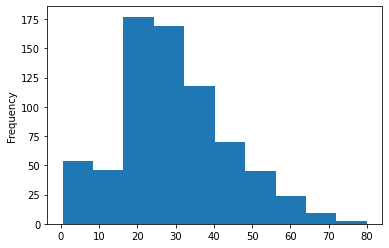

In [14]:
df1['Age'].plot.hist()

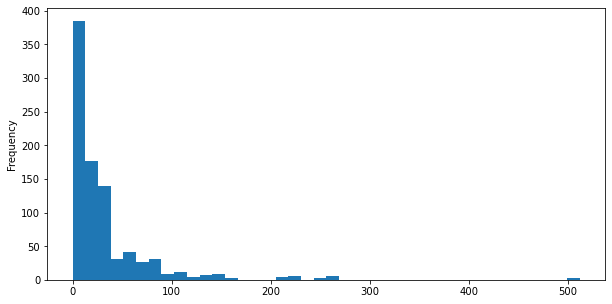

In [15]:
df1['Fare'].plot.hist(bins = 40, figsize = (10,5))

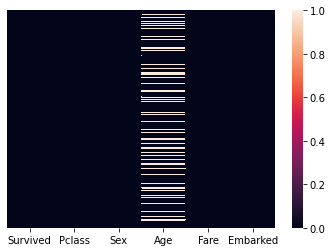

In [16]:
sns.heatmap(df1.isnull(),yticklabels=False)

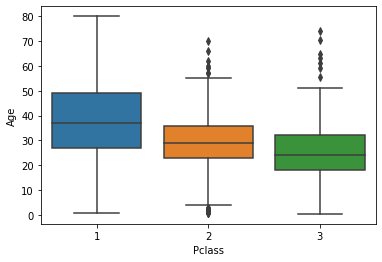

In [17]:
sns.boxplot(x='Pclass',y = 'Age',data=df1)

In [18]:
def age(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else :
        return age

In [19]:
df1['age'] = df1[['Age','Pclass']].apply(age,axis = 1)

In [20]:
df1.drop('Age',axis = 1,inplace = True)
df1.head()

,Survived,Pclass,Sex,Fare,Embarked,age
0,0,3,male,7.2500,S,22.0
1,1,1,female,71.2833,C,38.0
2,1,3,female,7.9250,S,26.0
3,1,1,female,53.1000,S,35.0
4,0,3,male,8.0500,S,35.0


In [21]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
Embarked    2
age         0
dtype: int64

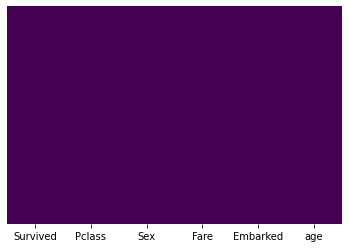

In [22]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [23]:
df1.dropna(inplace = True)

In [24]:
df1.head()

,Survived,Pclass,Sex,Fare,Embarked,age
0,0,3,male,7.2500,S,22.0
1,1,1,female,71.2833,C,38.0
2,1,3,female,7.9250,S,26.0
3,1,1,female,53.1000,S,35.0
4,0,3,male,8.0500,S,35.0


In [25]:
embarked_dummies = pd.get_dummies(df['Embarked'],drop_first=True)
sex_dummies = pd.get_dummies(df['Sex'],drop_first=True)

In [26]:
df1.head()

,Survived,Pclass,Sex,Fare,Embarked,age
0,0,3,male,7.2500,S,22.0
1,1,1,female,71.2833,C,38.0
2,1,3,female,7.9250,S,26.0
3,1,1,female,53.1000,S,35.0
4,0,3,male,8.0500,S,35.0


In [27]:
df2 = pd.concat([df1,embarked_dummies,sex_dummies],axis = 1)
df2.head()

,Survived,Pclass,Sex,Fare,Embarked,age,Q,S,male
0,0.0,3.0,male,7.2500,S,22.0,0,1,1
1,1.0,1.0,female,71.2833,C,38.0,0,0,0
2,1.0,3.0,female,7.9250,S,26.0,0,1,0
3,1.0,1.0,female,53.1000,S,35.0,0,1,0
4,0.0,3.0,male,8.0500,S,35.0,0,1,1


In [28]:
df2.drop(['Sex','Embarked'],axis = 1,inplace = True)
df2.head()

,Survived,Pclass,Fare,age,Q,S,male
0,0.0,3.0,7.2500,22.0,0,1,1
1,1.0,1.0,71.2833,38.0,0,0,0
2,1.0,3.0,7.9250,26.0,0,1,0
3,1.0,1.0,53.1000,35.0,0,1,0
4,0.0,3.0,8.0500,35.0,0,1,1


In [29]:
df2.dropna(inplace = True)
df2.isnull().sum()

Survived    0
Pclass      0
Fare        0
age         0
Q           0
S           0
male        0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop(['Survived'],inplace=False,axis = 1),df2['Survived'],train_size = 0.9)

In [32]:
Y_train.shape

(800,)

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
model.score(X_test,Y_test)

0.8202247191011236

In [35]:
import pickle

In [36]:
with open ("titanic_trained_model",'wb') as f:
    pickle.dump(model,f)

In [37]:
with open("titanic_trained_model",'rb') as f:
    check = pickle.load(f)

In [38]:
check.score(X_test,Y_test)

0.8202247191011236